In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from util import save_dataframes, load_dataframes

In [2]:
df_games_sales = load_dataframes("vgsales_cleand")
df_games_vote = load_dataframes("games_of_all_time_cleand")

In [3]:
def Top_Per(df, value, top='Sales', head = 20, sales_type = 'Global_Sales'):
    plt.figure(figsize=(20,10))
    
    df = df if (value != 'Year') else df[df_games_sales['Year'] > 0]
    df = df.groupby(value).sum().sort_values(sales_type, ascending=False)
    df = df.head(head) if (value != 'Year') else df
    df = pd.DataFrame({value: df.index, sales_type: df[sales_type]}).reset_index(drop=True)

    ax = sns.barplot(x=sales_type, y=value, orient='h', data=df)
    ax.tick_params(axis='both'if (value != 'Year')else'x', labelsize=20)
    
    plt.xlabel('Count (in millions)', size=20)
    plt.ylabel(value, size=20)
    plt.title(f'Top {top} Per {value}', size=24)
    plt.savefig(f'Top {top} Per {value}')
    plt.show()

# Sales

In [4]:
df_games_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
df_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [6]:
df_games_sales.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

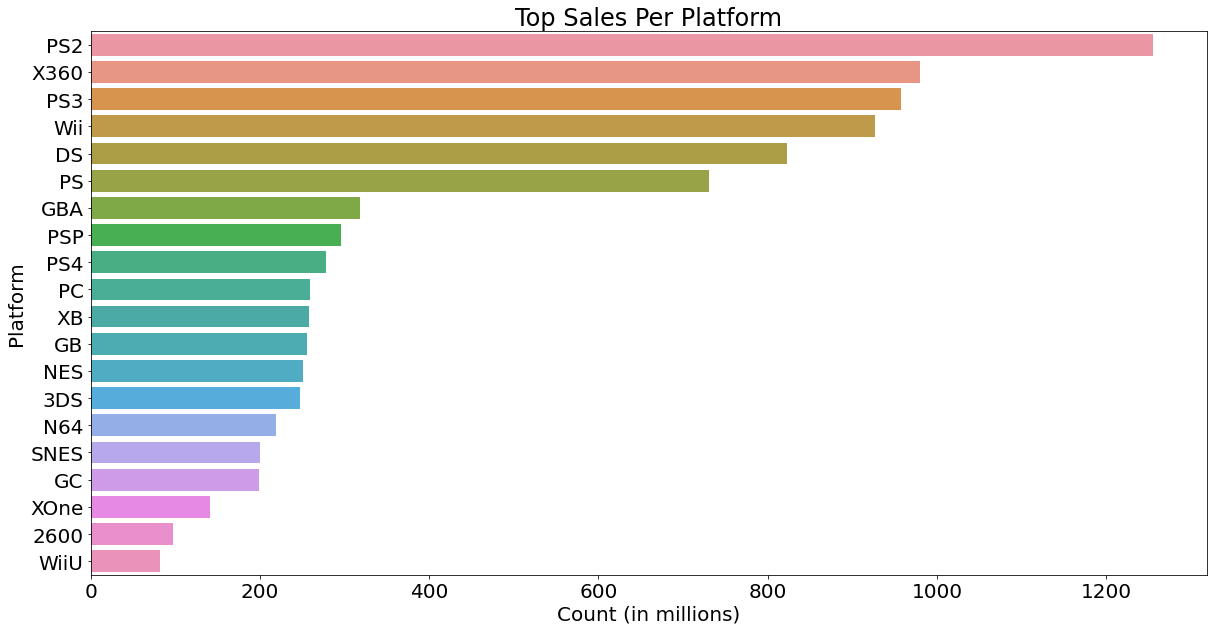

In [7]:
Top_Per(df_games_sales, 'Platform', top='Sales')

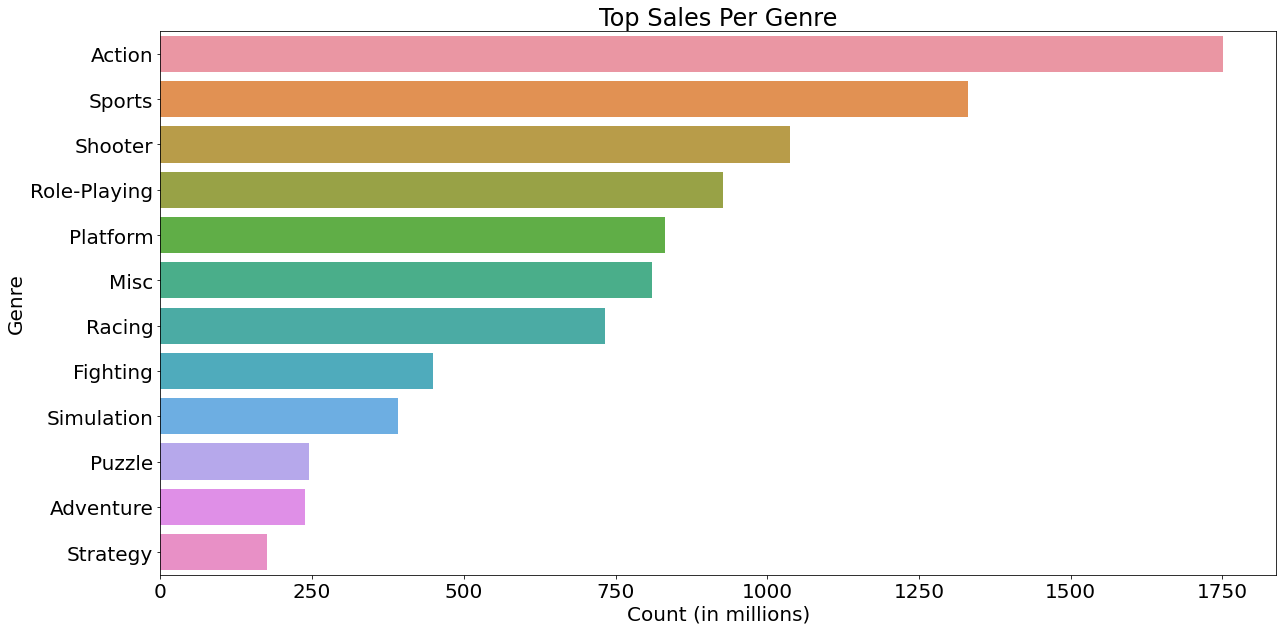

In [8]:
Top_Per(df_games_sales, 'Genre', top='Sales')

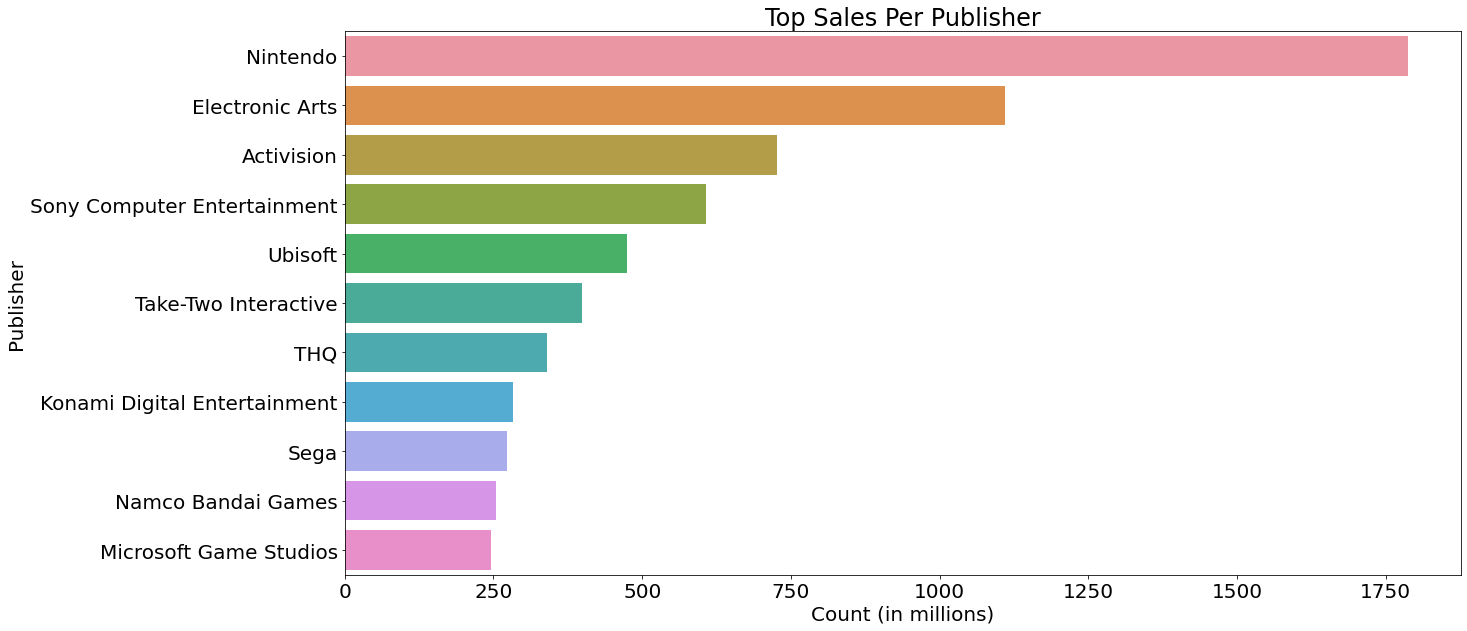

In [9]:
Top_Per(df_games_sales, 'Publisher', top='Sales', head = 11)

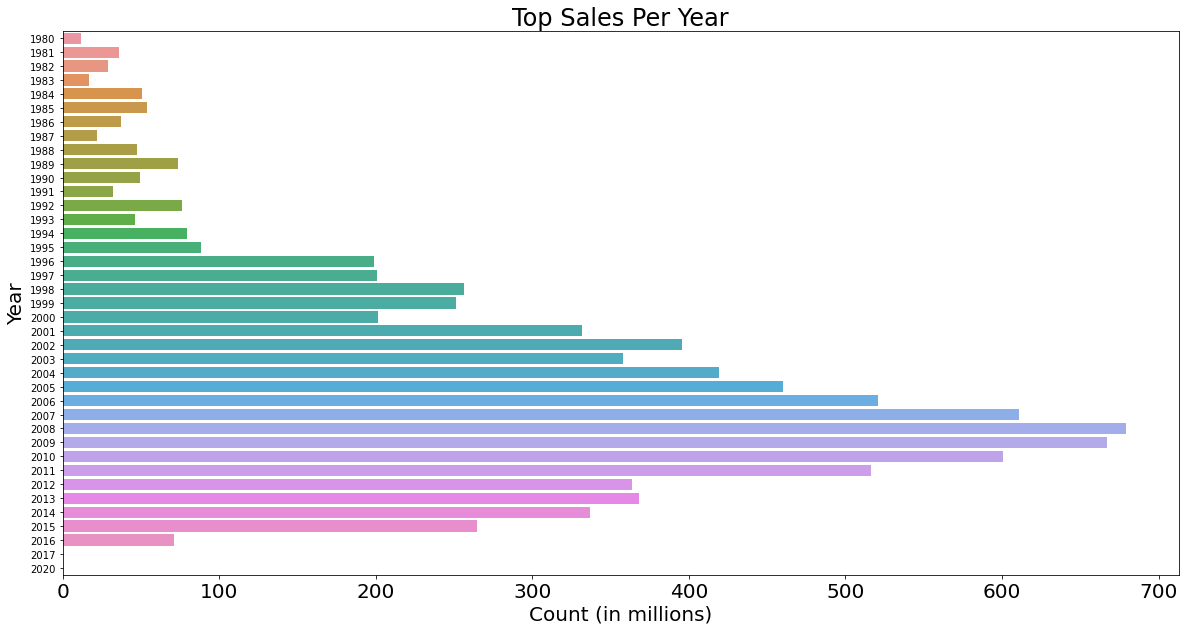

In [10]:
Top_Per(df_games_sales, 'Year', top='Sales')

# Votes

In [11]:
df_games_vote.head(10)

,Name,Meta_score,User_score,Platform,Description,URL,Developer,Genre,Type,Rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+
5,Halo: Combat Evolved,97.0,87.0,['xbox'],"Enter the mysterious world of Halo, an alien p...",https://www.metacritic.com/game/xbox/halo-comb...,Bungie Software,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",multiplayer,M
6,The House in Fata Morgana - Dreams of the Reve...,97.0,83.0,['switch'],A gothic suspense tale set in a cursed mansion...,https://www.metacritic.com/game/switch/the-hou...,HuneX,"['Adventure', 'Visual Novel']",singleplayer,M
7,NFL 2K1,97.0,62.0,['dreamcast'],"In the end, NFL 2K1 is a deeper, more refined ...",https://www.metacritic.com/game/dreamcast/nfl-2k1,Visual Concepts,"['Sports', 'Traditional', 'Football', 'Sim']",NaN,E
8,Uncharted 2: Among Thieves,96.0,88.0,['playstation-3'],Fortune hunter Nathan Drake returns in Unchart...,https://www.metacritic.com/game/playstation-3/...,Naughty Dog,"['Action Adventure', 'Modern', 'Linear']",singleplayer,T
9,Tekken 3,96.0,91.0,['playstation'],"An ancient evil force has reawakened, attackin...",https://www.metacritic.com/game/playstation/te...,Namco,"['Action', 'Fighting', '3D']",multiplayer,T


In [12]:
df_games_vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         8831 non-null   object 
 1   Meta_score   8831 non-null   float64
 2   User_score   8831 non-null   float64
 3   Platform     8831 non-null   object 
 4   Description  8831 non-null   object 
 5   URL          8831 non-null   object 
 6   Developer    8821 non-null   object 
 7   Genre        8831 non-null   object 
 8   Type         6727 non-null   object 
 9   Rating       7691 non-null   object 
dtypes: float64(2), object(8)
memory usage: 690.0+ KB


In [13]:
df_games_vote.isnull().sum()

Name              0
Meta_score        0
User_score        0
Platform          0
Description       0
URL               0
Developer        10
Genre             0
Type           2104
Rating         1140
dtype: int64

In [14]:
df_games_vote['Name'].nunique()

8831

In [15]:
platforms = df_games_vote['Platform'].apply(lambda x : ast.literal_eval(x)).explode().value_counts()
print(f'Number of different platforms: {len(platforms)}')
platforms

Number of different platforms: 22


pc                  3108
playstation-4       1344
xbox-360            1015
switch               931
playstation-2        881
playstation-3        821
xbox-one             747
xbox                 484
ds                   453
wii                  398
psp                  325
gamecube             300
game-boy-advance     295
3ds                  246
playstation-vita     170
playstation          127
wii-u                123
playstation-5         90
dreamcast             80
xbox-series-x         49
nintendo-64           48
stadia                 3
Name: Platform, dtype: int64

In [16]:
genres = df_games_vote['Genre'].apply(lambda x : ast.literal_eval(x)).explode().value_counts()
print(f'Number of different platforms: {len(genres)}')
genres

Number of different platforms: 168


Action              3125
General             2488
Action Adventure    1208
Shooter             1101
Role-Playing        1059
                    ... 
Civilian Plane         2
Bowling                2
Tank                   1
Drag                   1
Skating                1
Name: Genre, Length: 168, dtype: int64

In [17]:
df_games_vote['Type'].dropna().value_counts()

singleplayer    3527
multiplayer     3200
Name: Type, dtype: int64

In [18]:
df_games_vote['Rating'].dropna().value_counts()

T       2636
E       2371
M       1535
E10+    1128
RP        14
K-A        6
AO         1
Name: Rating, dtype: int64

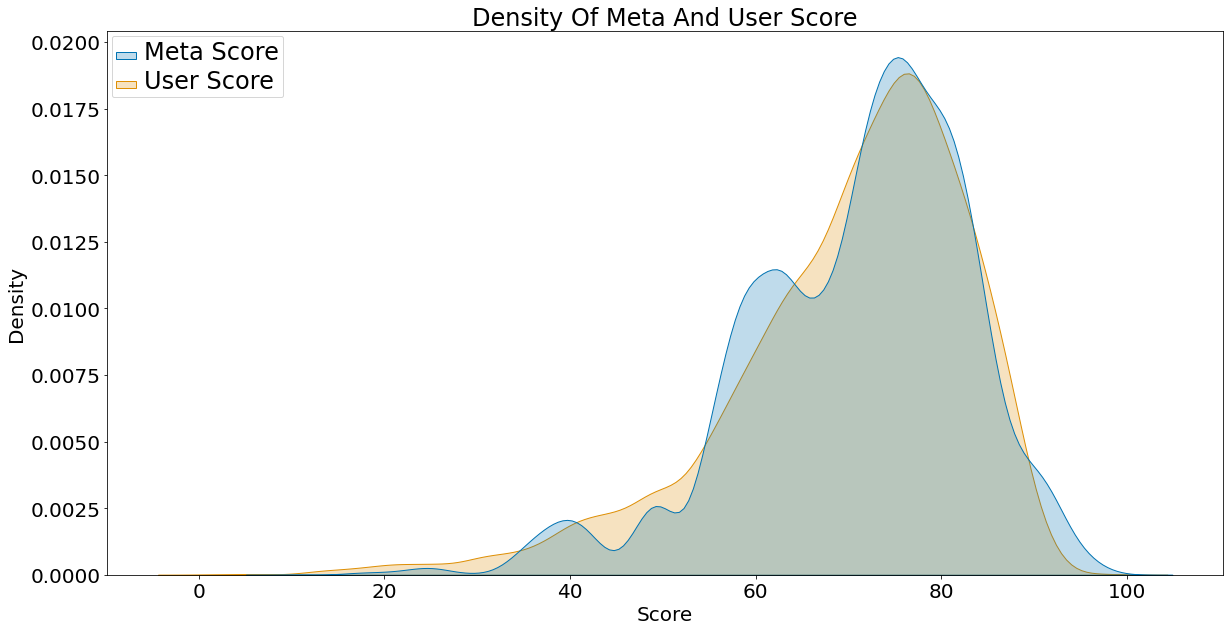

In [19]:
plt.figure(figsize=(20,10))
ax = sns.kdeplot(data = df_games_vote[['Meta_score', 'User_score']]
                 .rename(columns={'Meta_score': 'Meta Score', 'User_score': 'User Score'}),
                 fill=True,  palette='colorblind')

sns.move_legend(ax, 'upper left')
plt.setp(ax.get_legend().get_texts(), fontsize=24)
ax.tick_params(axis='both', labelsize=20)

plt.xlabel(f'Score', size=20)
plt.ylabel(f'Density', size=20)
plt.title(f'Density Of Meta And User Score', size=24)
plt.savefig('Density Of Meta And User Score')
plt.show()